In [5]:
# Logistic Regression을 구현해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD


In [20]:
# Raw Data Loading
df = pd.read_csv('admission.csv')
# display(df)  # 400 rows × 4 columns

# 결측치 부터 알아보아요!
# df.info()
# df.isnull().sum()
# 결측치는 존재하지 않네요!

# 이상치도 알아보아야 해요!
# 이상치를 눈으로 확인하려면 boxplot을 그려보면 되요!
# fig = plt.figure()
# fig_gre = fig.add_subplot(1,3,1)
# fig_gpa = fig.add_subplot(1,3,2)
# fig_rank = fig.add_subplot(1,3,3)

# fig_gre.boxplot(df['gre'])
# fig_gpa.boxplot(df['gpa'])
# fig_rank.boxplot(df['rank'])

# plt.tight_layout()
# plt.show()

# 수치상 이상치로 표현이 되지만
# 실제 데이터예요!(이상치가 아니예요!)
# 하지만 우리학습을 위해 이상치로 판별된 데이터를 삭제하고 진행

zscore_threshold = 2.0  # zscore 임계값 -2이하, 2이상이면 이상치

for col in df.columns:
    outlier = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    df = df.loc[np.isin(df[col], outlier, invert=True)]

print(df.shape)  # (382, 4)  18개의 데이터가 이상치로 제거!

# 정규화를 진행해야 해요!
x_data = df.drop('admit', axis=1, inplace=False).values
t_data = df['admit'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)



(382, 4)


array([[380.  ,   3.61,   3.  ],
       [660.  ,   3.67,   3.  ],
       [800.  ,   4.  ,   1.  ],
       ...,
       [560.  ,   3.04,   3.  ],
       [700.  ,   3.65,   2.  ],
       [600.  ,   3.89,   3.  ]])

In [ ]:
# Model을 구현해 보아요!
# sklearn부터 구현해 보아요!

sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data,
                  t_data.ravel())

# predict
predict_value = np.array([[600, 3.8, 1]])
result_proba = sklearn_model.predict_proba(predict_value)
print(result_proba)  # [[0.43740782 0.56259218]]


[[0.43740782 0.56259218]]


In [ ]:
# Tensorflow로 구현해 보아요!

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                    loss='binary_crossentropy')

keras_model.fit(x_data_norm,
                t_data,
                epochs=500,
                verbose=0)

# predict
predict_value = np.array([[600, 3.8, 1]])
predict_value_norm = scaler.transform(predict_value)
result = keras_model.predict(predict_value_norm)
print(result)  # sklearn : [[0.43740782 0.56259218]]
               # tensorflow : [[0.57682455]]


1/1 [==============================] - 0s 71ms/step
[[0.2596778]]


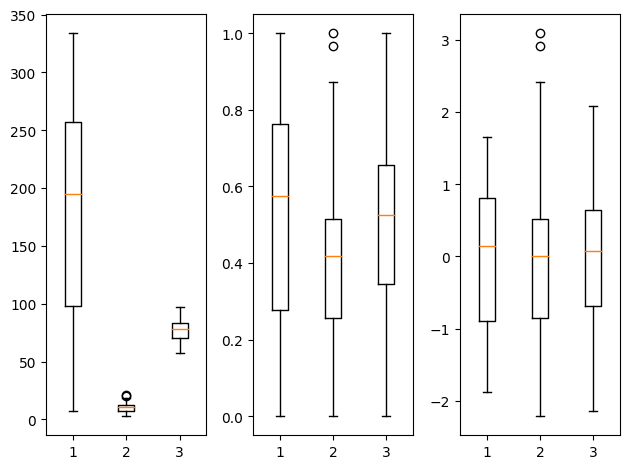

In [8]:
# 정규화를 하면 데이터가 어떻게 변하나요?
# boxplot을 이용해서 살펴보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 데이터 로딩과 전처리!

# Raw Data Loading
df = pd.read_csv('ozone.csv')

training_data = df[['Solar.R', 'Wind', 'Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')

# 2. 이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# print(outlier)

# 이상치를 제거한 결과를 얻어야 해요!
# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]
# display(training_data)

x_data = training_data.drop('Ozone', axis=1, inplace=False).values
t_data = training_data['Ozone'].values.reshape(-1,1)

# 3. 정규화 진행(Normalization)
#    모든 feature에 대해 scale을 0과 1로 변경!
#    이렇게 해야 해요!
#    프로그램적으로 이 작업을 하려면 코드작업을 해야해서 좀 그래요!
#    sklearn을 이용하면 이 정규화 작업을 아주 쉽게 할 수 있어요!
scaled_x = MinMaxScaler()
scaled_t = MinMaxScaler()

standard_scaler = StandardScaler()


scaled_x.fit(x_data)
scaled_t.fit(t_data)
standard_scaler.fit(x_data)

# 정규화된 Training Data Set 준비
x_data_norm = scaled_x.transform(x_data)
t_data_norm = scaled_t.transform(t_data)
x_data_stand_norm = standard_scaler.transform(x_data)


fig = plt.figure()
fig_ori = fig.add_subplot(1,3,1)
fig_minmax = fig.add_subplot(1,3,2)
fig_stand = fig.add_subplot(1,3,3)


fig_ori.boxplot(x_data)
fig_minmax.boxplot(x_data_norm)
fig_stand.boxplot(x_data_stand_norm)

plt.tight_layout()
plt.show()

In [10]:
# Imbalanced Data Problem을 해결해 보아요!
# SMOTE 알고리즘을 이용해 보아요!

# 불균형한 데이터가 있어야 해요!
# 유방암 예측 데이터셋으로 해 보아요!

# 상당히 많은 feature가 있는데 그 중 4개만 골라서 사용해 보아요!
# feature의 의미는 자세히 알 필요는 없어요! 의학용어.
import numpy as np
import pandas as pd
from sklearn import datasets

# Raw Data Loading
data = datasets.load_breast_cancer()

df = pd.DataFrame(data.data,
                  columns=data.feature_names)


df = df[['mean radius', 'mean texture', 'mean area', 'mean symmetry']]


# target이 1이면 양성종양(좋은거), 0이면 악종종양(나쁜거) 열 지정
df['target'] = data.target
display(df)

,mean radius,mean texture,mean area,mean symmetry,target
0,17.99,10.38,1001.0,0.2419,0
1,20.57,17.77,1326.0,0.1812,0
2,19.69,21.25,1203.0,0.2069,0
3,11.42,20.38,386.1,0.2597,0
4,20.29,14.34,1297.0,0.1809,0
...,...,...,...,...,...
564,21.56,22.39,1479.0,0.1726,0
565,20.13,28.25,1261.0,0.1752,0
566,16.60,28.08,858.1,0.1590,0
567,20.60,29.33,1265.0,0.2397,0


In [11]:
# 위의 데이터셋은 label이 0 or 1로 구성되어 있어요.
# 이진분류 문제.. => logistic regression으로 나중에 학습이 될꺼예요!

# 학습하기 전에..데이터부터 정제해야 해요!
# label의 개수를 한번 세어 보아요!
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

x_data = df[['mean radius', 'mean texture', 'mean area', 'mean symmetry']]
t_data = df['target']

new_x, new_t = SMOTE(random_state=22).fit_resample(x_data, t_data)

new_t.value_counts()


target
0    357
1    357
Name: count, dtype: int64

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam


(569, 30)
(569,)


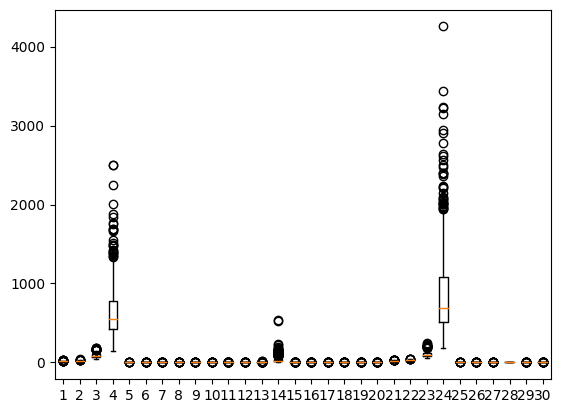

In [18]:
cancer = load_breast_cancer()

print(cancer.data.shape) # 
print(cancer.target.shape) # 0이 악성종양, 1이면 양성종양

x_data = cancer.data
t_data = cancer.target

plt.boxplot(x_data)
plt.show()

#결측치는 없구요 
#이상치는 처리안함 박스플롯에서는 이상치지만 실제데이터는 아님
# 정규화 해야함
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)